# Setting up a basic ReAct Agent in LangGraph

In [142]:
import os

os.environ["OPENAI_API_KEY"] = 'sk-***'

In [4]:
from langchain_community.tools import DuckDuckGoSearchRun  # Initialize the tool
search_ddg_tool = DuckDuckGoSearchRun()

tools = [search_ddg_tool]

In [10]:
search_ddg_tool.run('sinan ozdemir')

/Users/sinanozdemir/Library/Python/3.9/lib/python/site-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(


'Sinan Ozdemir is a data scientist, NLP expert, lecturer, mathematician, and accomplished author. He is currently the founder and CTO of LoopGenius, transforming the way entrepreneurs and startups market their products and services. Simultaneously, he is providing advisory services in AI and LLMs to VCs including Tola Capital. ... Sinan Ozdemir is a mathematician, data scientist, NLP expert, lecturer, and accomplished author. He is currently applying my extensive knowledge and experience in AI and Large Language Models (LLMs) as the founder and CTO of LoopGenius, transforming the way entrepreneurs and startups market their products and services. Sinan Ozdemir is a mathematician, data scientist, NLP expert, lecturer, and accomplished author. He is currently applying my extensive knowledge and experience in AI and Large Language Models (LLMs) as the founder and CTO of LoopGenius, transforming the way entrepreneurs and startups market their products and services. Instructor Sinan Ozdemir 

In [11]:
from langchain import hub
from langchain_openai import ChatOpenAI

from langgraph.prebuilt import create_react_agent

# Choose the LLM that will drive the agent
llm = ChatOpenAI(model="gpt-4o-mini")
agent_executor = create_react_agent(llm, tools)

In [28]:
response = agent_executor.invoke({"messages": [("user", "Who is the current Ravens QB?")]})

/Users/sinanozdemir/Library/Python/3.9/lib/python/site-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(


In [29]:
response['messages'][-1].content

'The current quarterback for the Baltimore Ravens is Lamar Jackson. He has been with the team since being drafted in 2018 and is a two-time NFL Most Valuable Player (MVP).'

In [30]:
for event in agent_executor.stream({"messages": [("user", "Who is the current Ravens QB?")]}):
    print(event)


{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_x5EWLvvUtt0MbvsPHJR9JapD', 'function': {'arguments': '{"query":"current Baltimore Ravens quarterback 2023"}', 'name': 'duckduckgo_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 80, 'total_tokens': 104, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_b376dfbbd5', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-2cc8b884-027a-43a5-af7e-2a65177f03c2-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'current Baltimore Ravens quarterback 2023'}, 'id': 'call_x5EWLvvUtt0MbvsPHJR9JapD', 'type': 'tool_call'}], usage_metadata={'input_tokens': 80, 'output_tokens': 24, 'total_tokens': 

/Users/sinanozdemir/Library/Python/3.9/lib/python/site-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(


{'tools': {'messages': [ToolMessage(content="The 2023 season was the Baltimore Ravens' 28th in the National Football League (NFL) and their 16th under head coach John Harbaugh.Baltimore made their second consecutive postseason appearance, having improved on their 10-7 record from the previous season.. The Ravens' NFL-record preseason winning streak was snapped at 24 games when they lost to the Washington Commanders in the second week ... Lamar Demeatrice Jackson Jr. (born January 7, 1997) is an American professional football quarterback for the Baltimore Ravens of the National Football League (NFL). He played college football for the Louisville Cardinals, winning the Heisman Trophy in 2016, and was selected by the Ravens with the final pick in the first round of the 2018 NFL draft.A two-time recipient of the NFL Most Valuable ... On April 27, 2023, the Baltimore Ravens signed superstar quarterback Lamar Jackson to what was then the largest contract in NFL history, one that would pay hi

In [31]:
print(event['agent']['messages'][-1].content)

The current quarterback for the Baltimore Ravens is Lamar Jackson. He signed a contract extension in April 2023, making him one of the highest-paid quarterbacks in NFL history.


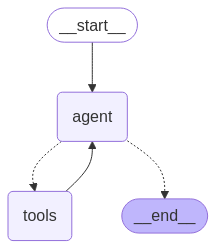

In [25]:
# Compile the graph
from IPython.display import Image, display

display(Image(agent_executor.get_graph().draw_mermaid_png()))

In [27]:
response = agent_executor.invoke({"messages": [("user", "Who is Sinan Ozdemir?")]})

print(response['messages'][-1].content)

/Users/sinanozdemir/Library/Python/3.9/lib/python/site-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(


Sinan Ozdemir is a prominent data scientist, NLP (Natural Language Processing) expert, lecturer, and author. He currently serves as the founder and CTO of LoopGenius, where he focuses on transforming marketing strategies for entrepreneurs and startups. In addition to his role at LoopGenius, he provides advisory services in AI and Large Language Models (LLMs) to venture capital firms, including Tola Capital.

Ozdemir has previously lectured on Data Science at Johns Hopkins University and has authored several textbooks on data science and machine learning. He is recognized for his extensive knowledge and experience in AI and is actively involved in the development of modern NLP pipelines and transformer architectures.
